              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


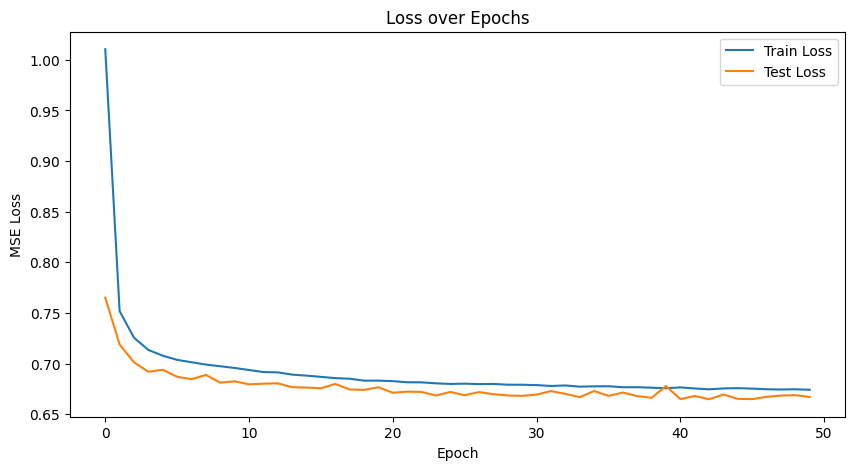

273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train R²: 0.3284560441970825
Test  R²: 0.337921142578125
새로운 데이터(순서대로 입력): season, holiday, workingday, weather, temp, atemp, humidity, windspeed
예: 1 0 1 2 10 12 60 5 : 1 0 1 2 10 12 60 15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
예측된 대여 횟수: 102


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# 1. 데이터 불러오기
url = "https://raw.githubusercontent.com/pykwon/python/refs/heads/master/data/train.csv"
df = pd.read_csv(url)
print(df.head())

# 2. 독립변수/종속변수 선택
# count: 대여횟수(목표값)
# casual, registered는 이미 count에 포함된 수치이므로 사용 X
# datetime은 시간 문자열이므로 제외
X = df[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed']].values
y = df[['count']].values

# 3. train/test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 스케일링
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_s = scaler_X.fit_transform(X_train)
X_test_s = scaler_X.transform(X_test)
y_train_s = scaler_y.fit_transform(y_train)
y_test_s = scaler_y.transform(y_test)

# 5. 다중선형회귀 모델(딥러닝)
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_s.shape[1],)),
    Dense(1)  # 회귀이므로 활성화 없음
])
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# 6. 모델 학습
history = model.fit(X_train_s, y_train_s,
                    validation_data=(X_test_s, y_test_s),
                    epochs=50, verbose=0)

# 7. Loss 시각화
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

# 8. 설명력(R²) 계산
y_pred_train_s = model.predict(X_train_s)
y_pred_test_s = model.predict(X_test_s)

# 역스케일링
y_pred_train = scaler_y.inverse_transform(y_pred_train_s)
y_pred_test = scaler_y.inverse_transform(y_pred_test_s)

print("Train R²:", r2_score(y_train, y_pred_train))
print("Test  R²:", r2_score(y_test, y_pred_test))

# 9. 새로운 데이터 입력 받아 예측
# season,holiday,workingday,weather,temp,atemp,humidity,windspeed
print("새로운 데이터(순서대로 입력): season, holiday, workingday, weather, temp, atemp, humidity, windspeed")
new_data = input("예: 1 0 1 2 10 12 60 5 : \n")

# 문자열 → 숫자 list
new_data = np.array(list(map(float, new_data.split()))).reshape(1,-1)

# 스케일링 & 예측
new_data_s = scaler_X.transform(new_data)
pred_s_count_s = model.predict(new_data_s)
pred_s_count = scaler_y.inverse_transform(pred_s_count_s)

print("예측된 대여 횟수:", int(pred_s_count[0,0]))
